# Práctica

1. Revisar que el *primer nombre del beneficiario* no tenga caracteres especiales
2. Revisar que la *fecha* esté en una linea de texto con el formato yyyymmdd
3. Revisar que la longitud del *teléfono* no sea superior a 30

Cargar el archivo

In [100]:
import pandas as pd

In [101]:
ain = pd.read_excel('./tabla_ain.xlsx')

In [102]:
vals = pd.DataFrame(columns=['V1', 'V2', 'V3'])

In [103]:
vals

,V1,V2,V3


In [104]:
# ontener primeras y últimas 5 filas
# ain.head(), ain.tail()

# ver las columnas de una tabla
# ain.columns

# tamaño de la tabla
# ain.shape
# filtrar las columnas
tabla = ain[['Número de identificación del beneficiario',
             'Primer nombre del beneficiario',
             'Fecha de nacimiento del beneficiario',
             'Teléfonos']].copy()
# tabla.head()

### 1. Revisar que el *primer nombre del beneficiario* no tenga caracteres especiales

Mirar la columna de interés

In [105]:
tabla['Primer nombre del beneficiario'].head()

0     SAMANTA
1       MARIA
2      ISABEL
3    EMILIANA
4       MARIA
Name: Primer nombre del beneficiario, dtype: object

Validamos los tipos de datos en la columna

In [106]:
''.isalpha(), 'hola todos'.isalpha()

(False, False)

Creamos la validación

In [107]:
v1 = []
for nombre in tabla['Primer nombre del beneficiario']:
    if nombre == '':
        pass
    v1.append(int(nombre.isalpha()))

In [108]:
vals['V1'] = v1

### 2. Revisar que la *fecha* esté en una linea de texto con el formato yyyymmdd

Mirar la columna de interés

In [109]:
tabla['Fecha de nacimiento del beneficiario'].head()

0    2017-02-09 00:00:00
1    2017-09-19 00:00:00
2    2017-05-17 00:00:00
3    2017-11-11 00:00:00
4    2017-11-16 00:00:00
Name: Fecha de nacimiento del beneficiario, dtype: object

Validamos los tipos de datos en la columna

In [110]:
prueba = str(tabla['Fecha de nacimiento del beneficiario'][0])
prueba

'2017-02-09 00:00:00'

Creamos la validación

In [111]:
fecha_ = prueba.replace(' ','').replace('-', '')

fecha_ = fecha_[:-8]
fecha_

'20170209'

In [112]:
v2 = []
for fecha in tabla['Fecha de nacimiento del beneficiario']:
    
    fecha_ = str(fecha).replace(' ','').replace('-', '')
    fecha_ = fecha_[:-8]

    if len(fecha_)<8:
        v2.append('error')
    else: 
        v2.append(fecha_)

In [113]:
vals['V2'] = v2

In [114]:
vals

,V1,V2,V3
0,1,20170209,NaN
1,1,20170919,NaN
2,1,20170517,NaN
3,1,20171111,NaN
4,1,20171116,NaN
...,...,...,...
67275,1,error,NaN
67276,1,error,NaN
67277,1,error,NaN
67278,1,error,NaN


### 3. Revisar que la longitud del *teléfono* no sea superior a 30

Mirar la columna de interés

In [115]:
tabla['Teléfonos'].head()

0    3116227690
1    3017250679
2    3137173731
3    3127151186
4    3136619397
Name: Teléfonos, dtype: object

Validamos los tipos de datos en la columna

In [116]:
type(tabla['Teléfonos'][0])

int

Creamos la validación

In [117]:
len(str(tabla['Teléfonos'][0]))

10

In [118]:
v3 = []
for telefono in tabla['Teléfonos']:
    if len(str(telefono)) < 30:
        v3.append(1)
    else:
        v3.append(0)

In [119]:
vals['V3'] = v3

In [120]:
vals['cedula'] = tabla['Número de identificación del beneficiario']

In [121]:
vals

,V1,V2,V3,cedula
0,1,20170209,1,1011597076
1,1,20170919,1,1013466386
2,1,20170517,1,1040051008
3,1,20171111,1,1011597133
4,1,20171116,1,1011597139
...,...,...,...,...
67275,1,error,1,1034931342
67276,1,error,1,1022166608
67277,1,error,1,1036460841
67278,1,error,1,1018269998


## Gráficas

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

### Validación 1

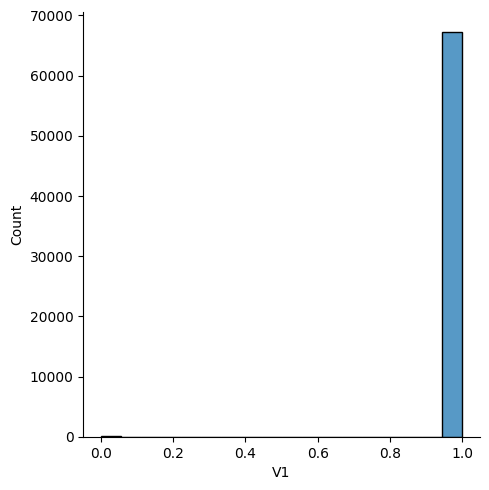

In [123]:
sns.displot(vals['V1'])

In [94]:
v1_c = len([1 for val in v1 if val == 1])
v1_f = len(v1)-v1_c

In [95]:
v1_c, v1_f

(67198, 82)

### Validación 2

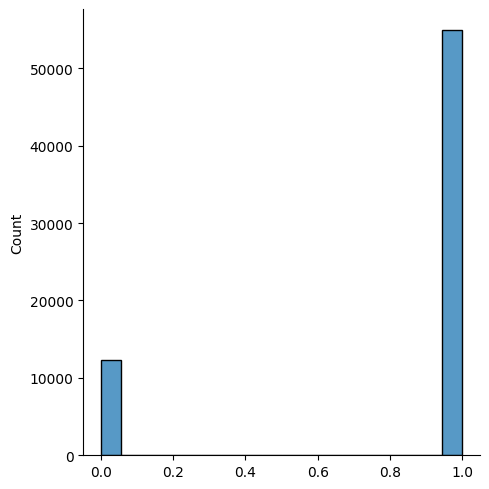

In [124]:
sns.displot([0 if val == 'error' else 1 for val in vals['V2']])

In [125]:
v2_c = len([1 for val in vals['V2'] if val != 'error' ])
v2_f = len(v2)-v2_c

In [127]:
v2_c, v2_f

(54917, 12363)

### Validación 3

In [129]:
vals['V3']

0        1
1        1
2        1
3        1
4        1
        ..
67275    1
67276    1
67277    1
67278    1
67279    1
Name: V3, Length: 67280, dtype: int64

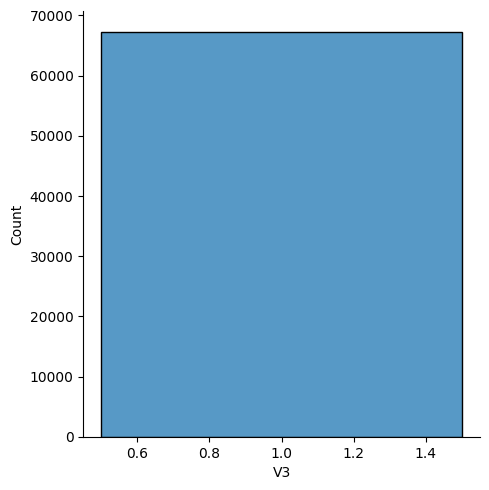

In [134]:
sns.displot(vals['V3'])

In [131]:
v3_c = len([1 for val in v3 if val == 1])
v3_f = len(v3)-v3_c

In [132]:
v3_c, v3_f

(67280, 0)

In [135]:
vals

,V1,V2,V3,cedula
0,1,20170209,1,1011597076
1,1,20170919,1,1013466386
2,1,20170517,1,1040051008
3,1,20171111,1,1011597133
4,1,20171116,1,1011597139
...,...,...,...,...
67275,1,error,1,1034931342
67276,1,error,1,1022166608
67277,1,error,1,1036460841
67278,1,error,1,1018269998


## Guardar las validaciones

In [136]:
vals.to_excel('./tabla_ain_vals.xlsx', index=False)